In [3]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Combined_QB.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_accuracy_percent', 'weighted_avg_aimed_passes',
       'weighted_avg_attempts', 'weighted_avg_avg_depth_of_target',
       'weighted_avg_avg_time_to_throw', 'weighted_avg_bats',
       'weighted_avg_big_time_throws', 'weighted_avg_btt_rate',
       'weighted_avg_completion_percent', 'weighted_avg_completions',
       'weighted_avg_declined_penalties', 'weighted_avg_def_gen_pressures',
       'weighted_avg_drop_rate', 'weighted_avg_dropbacks',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass', 'weighted_avg_grades_run',
       'weighted_avg_hit_as_threw', 'weighted_avg_interceptions',
       'weighted_avg_passing_snaps', 'weighted_avg_penalties',
       'w

In [6]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)


In [7]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())


      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       QB        11.439957         24.060673         11.0   
50   49ers  2020       QB         0.610494         34.317120         15.0   
70   49ers  2021       QB        17.863014        528.923536         11.0   
123  49ers  2022       QB         6.959654        412.212335         15.0   
12   Bears  2019       QB         7.396387        434.985593         15.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         15.0     64.331406    77.900000     27.90%  ...   
50         11.0     77.900000    61.558114      5.40%  ...   
70         15.0     61.558114    72.551515     19.50%  ...   
123        17.0     72.551515    71.909475     27.60%  ...   
12          9.0     62.198104    64.653902     -2.10%  ...   

     Previous_sack_percent  Previous_sacks  Previous_scrambles  \
17                8.019063       16.592188            4.965625   
50                6.800000      

In [8]:
team_data = df.groupby('Team')
print(team_data.head)


<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x307e2c290>>


In [9]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['Previous_twp_rate', 'Value_cap_space', 'Previous_AV', 'Previous_PFF', 
                                           'Previous_ypa', 'Previous_qb_rating', 'Previous_grades_pass', 
                                           'Previous_accuracy_percent', 'Previous_btt_rate']]  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [10]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[  3.14234375  11.43995749  11.          64.33140625   7.97234375
    87.7428125   65.1784375   74.32578125   2.13875   ]
  [  3.4          0.61049445  15.          77.9          8.4
   102.          75.7         78.8          2.6       ]
  [  4.5137558   17.8630137   11.          61.55811437   7.5927357
    90.24605873  60.39690881  75.82952087   3.00850077]]

 [[  3.80300158   7.39638682  15.          62.19810427   7.31090047
    94.68720379  58.16319115  72.39494471   4.11879937]
  [  3.44566474   8.06760848   9.          64.65390173   6.17991329
    84.07037572  64.42196532  71.81921965   3.93973988]
  [  4.44748201   6.39452055  10.          64.11294964   6.37266187
    86.73453237  62.75971223  72.42374101   4.23309353]]

 [[  3.66574501   9.24017003  11.          71.89754224   6.5546851
    87.06513057  69.64009217  72.4          5.11213518]
  [  4.6108484    0.61049445   8.          60.80876217   6.41641168
    75.65215577  60.30166898  68.67232267   2.71043115]
  [  3.536950

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [12]:
# Define the input layer
inputs = Input(shape=(3, 9))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


Epoch 1/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 5271.4238 - val_loss: 5229.9897
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4996.7114 - val_loss: 5058.0044
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4930.9238 - val_loss: 4875.2964
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4598.5854 - val_loss: 4688.1924
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4679.5044 - val_loss: 4513.1216
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4235.6440 - val_loss: 4323.5513
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3880.4172 - val_loss: 4112.8149
Epoch 8/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4001.3840 - val_loss: 3868.1519
Epoch 9/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3672.0110 - val_loss: 3595.9436
Epoch 10/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3349.9529 - val_loss: 3288.7339
Epoch 11/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3136.5791 - val_loss: 2951.8796
Epoch 12/80
4/4 ━━━━━━━━━━━━━

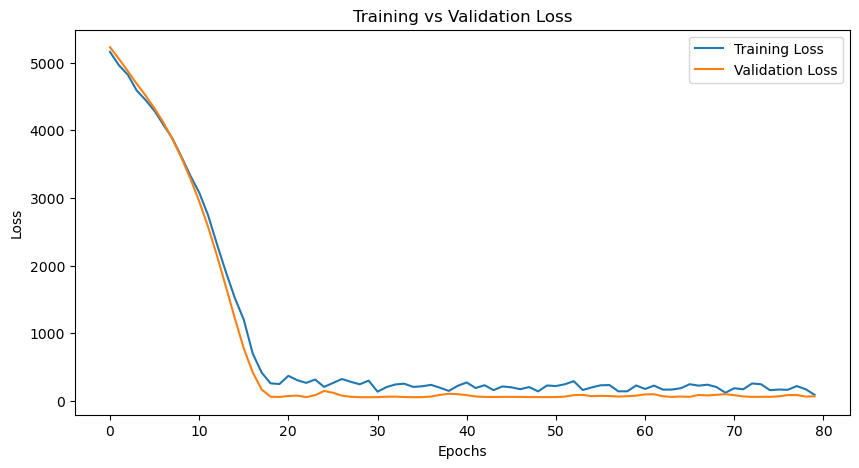

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
R² Score: 0.1210


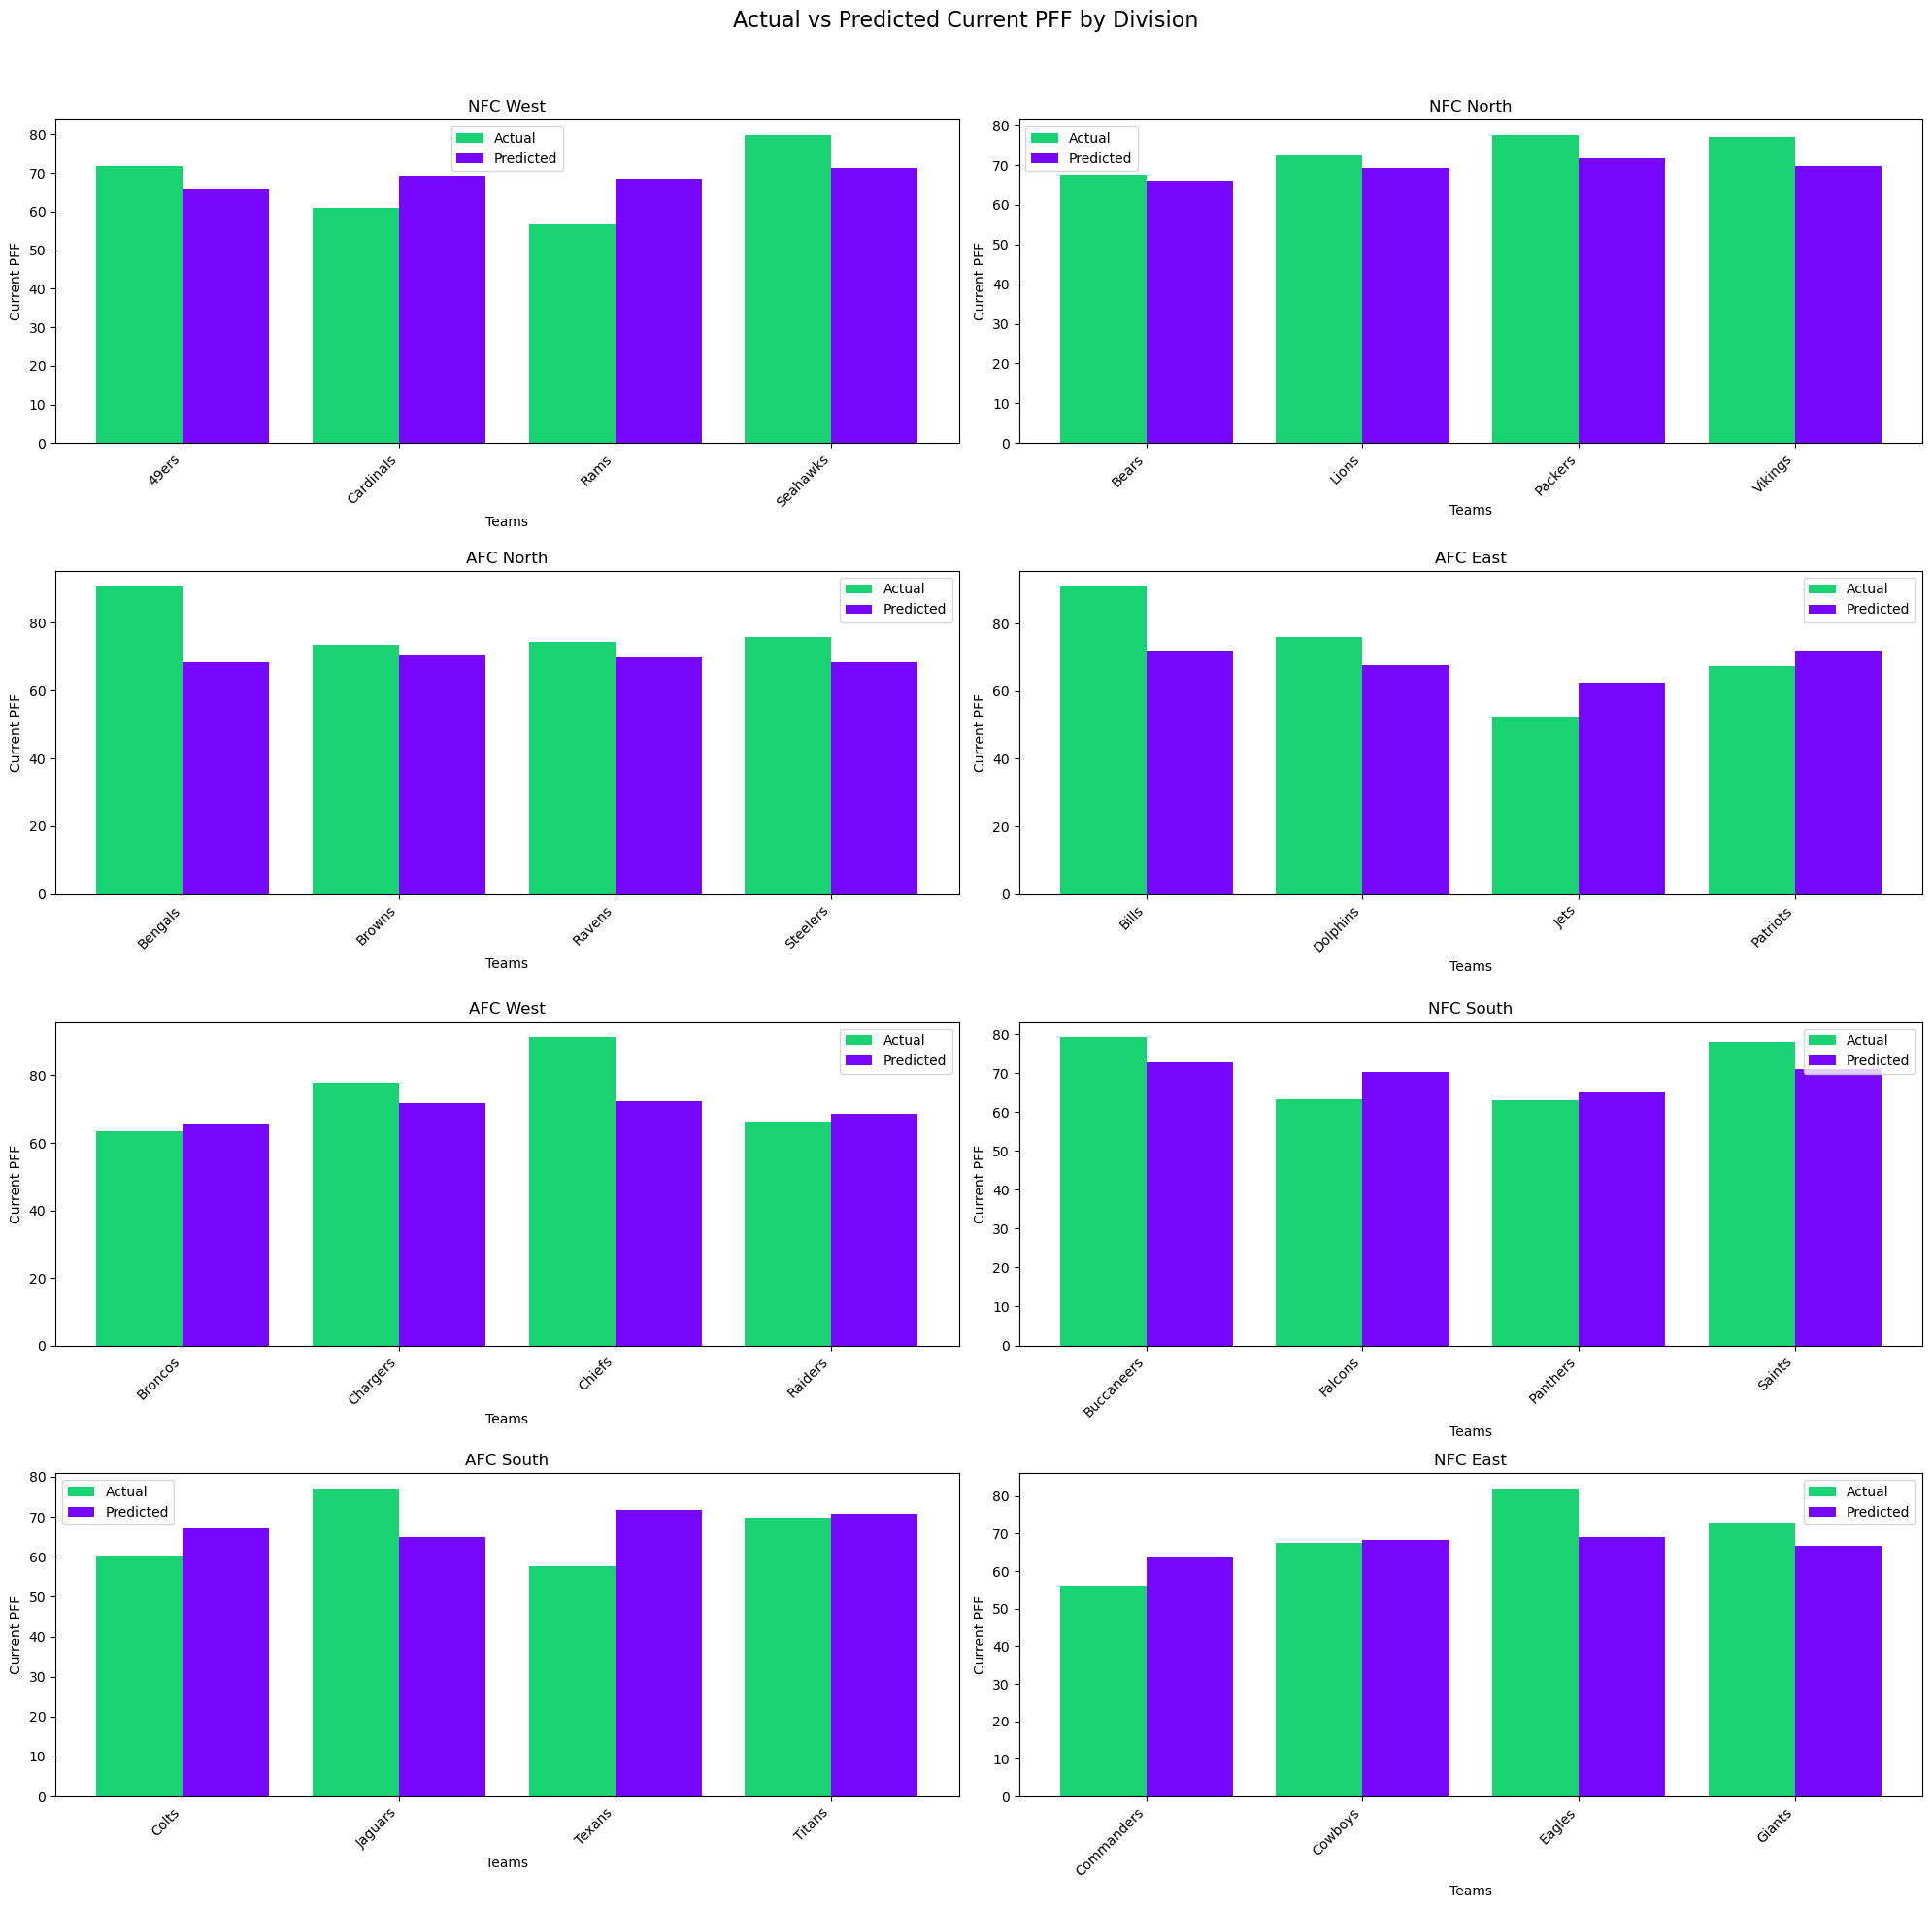

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 199.3273 - val_loss: 71.7542
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 216.5493 - val_loss: 65.9125
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 190.7872 - val_loss: 59.0790
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.9152 - val_loss: 62.3690
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 206.2930 - val_loss: 68.2711
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 202.0902 - val_loss: 83.3890
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 186.3411 - val_loss: 73.9038
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 253.8100 - val_loss: 62.9248
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 204.0029 - val_loss: 61.5266
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.1730 - val_loss: 72.5337
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 230.0609 - val_loss: 67.2250
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

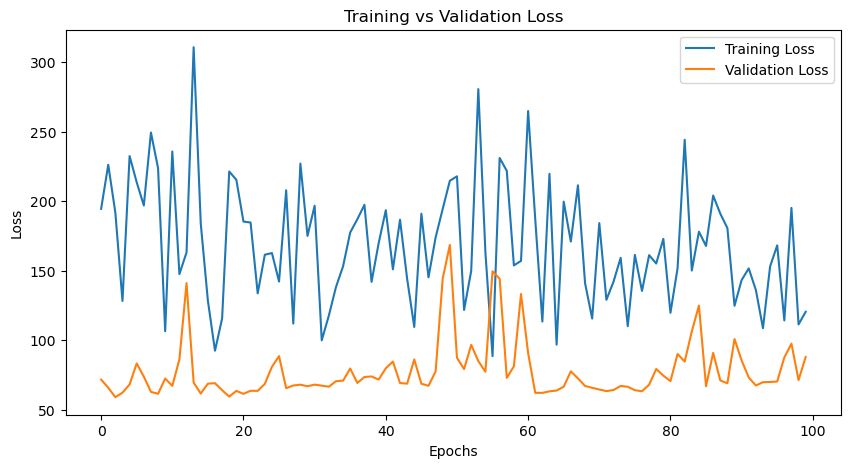

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.2245


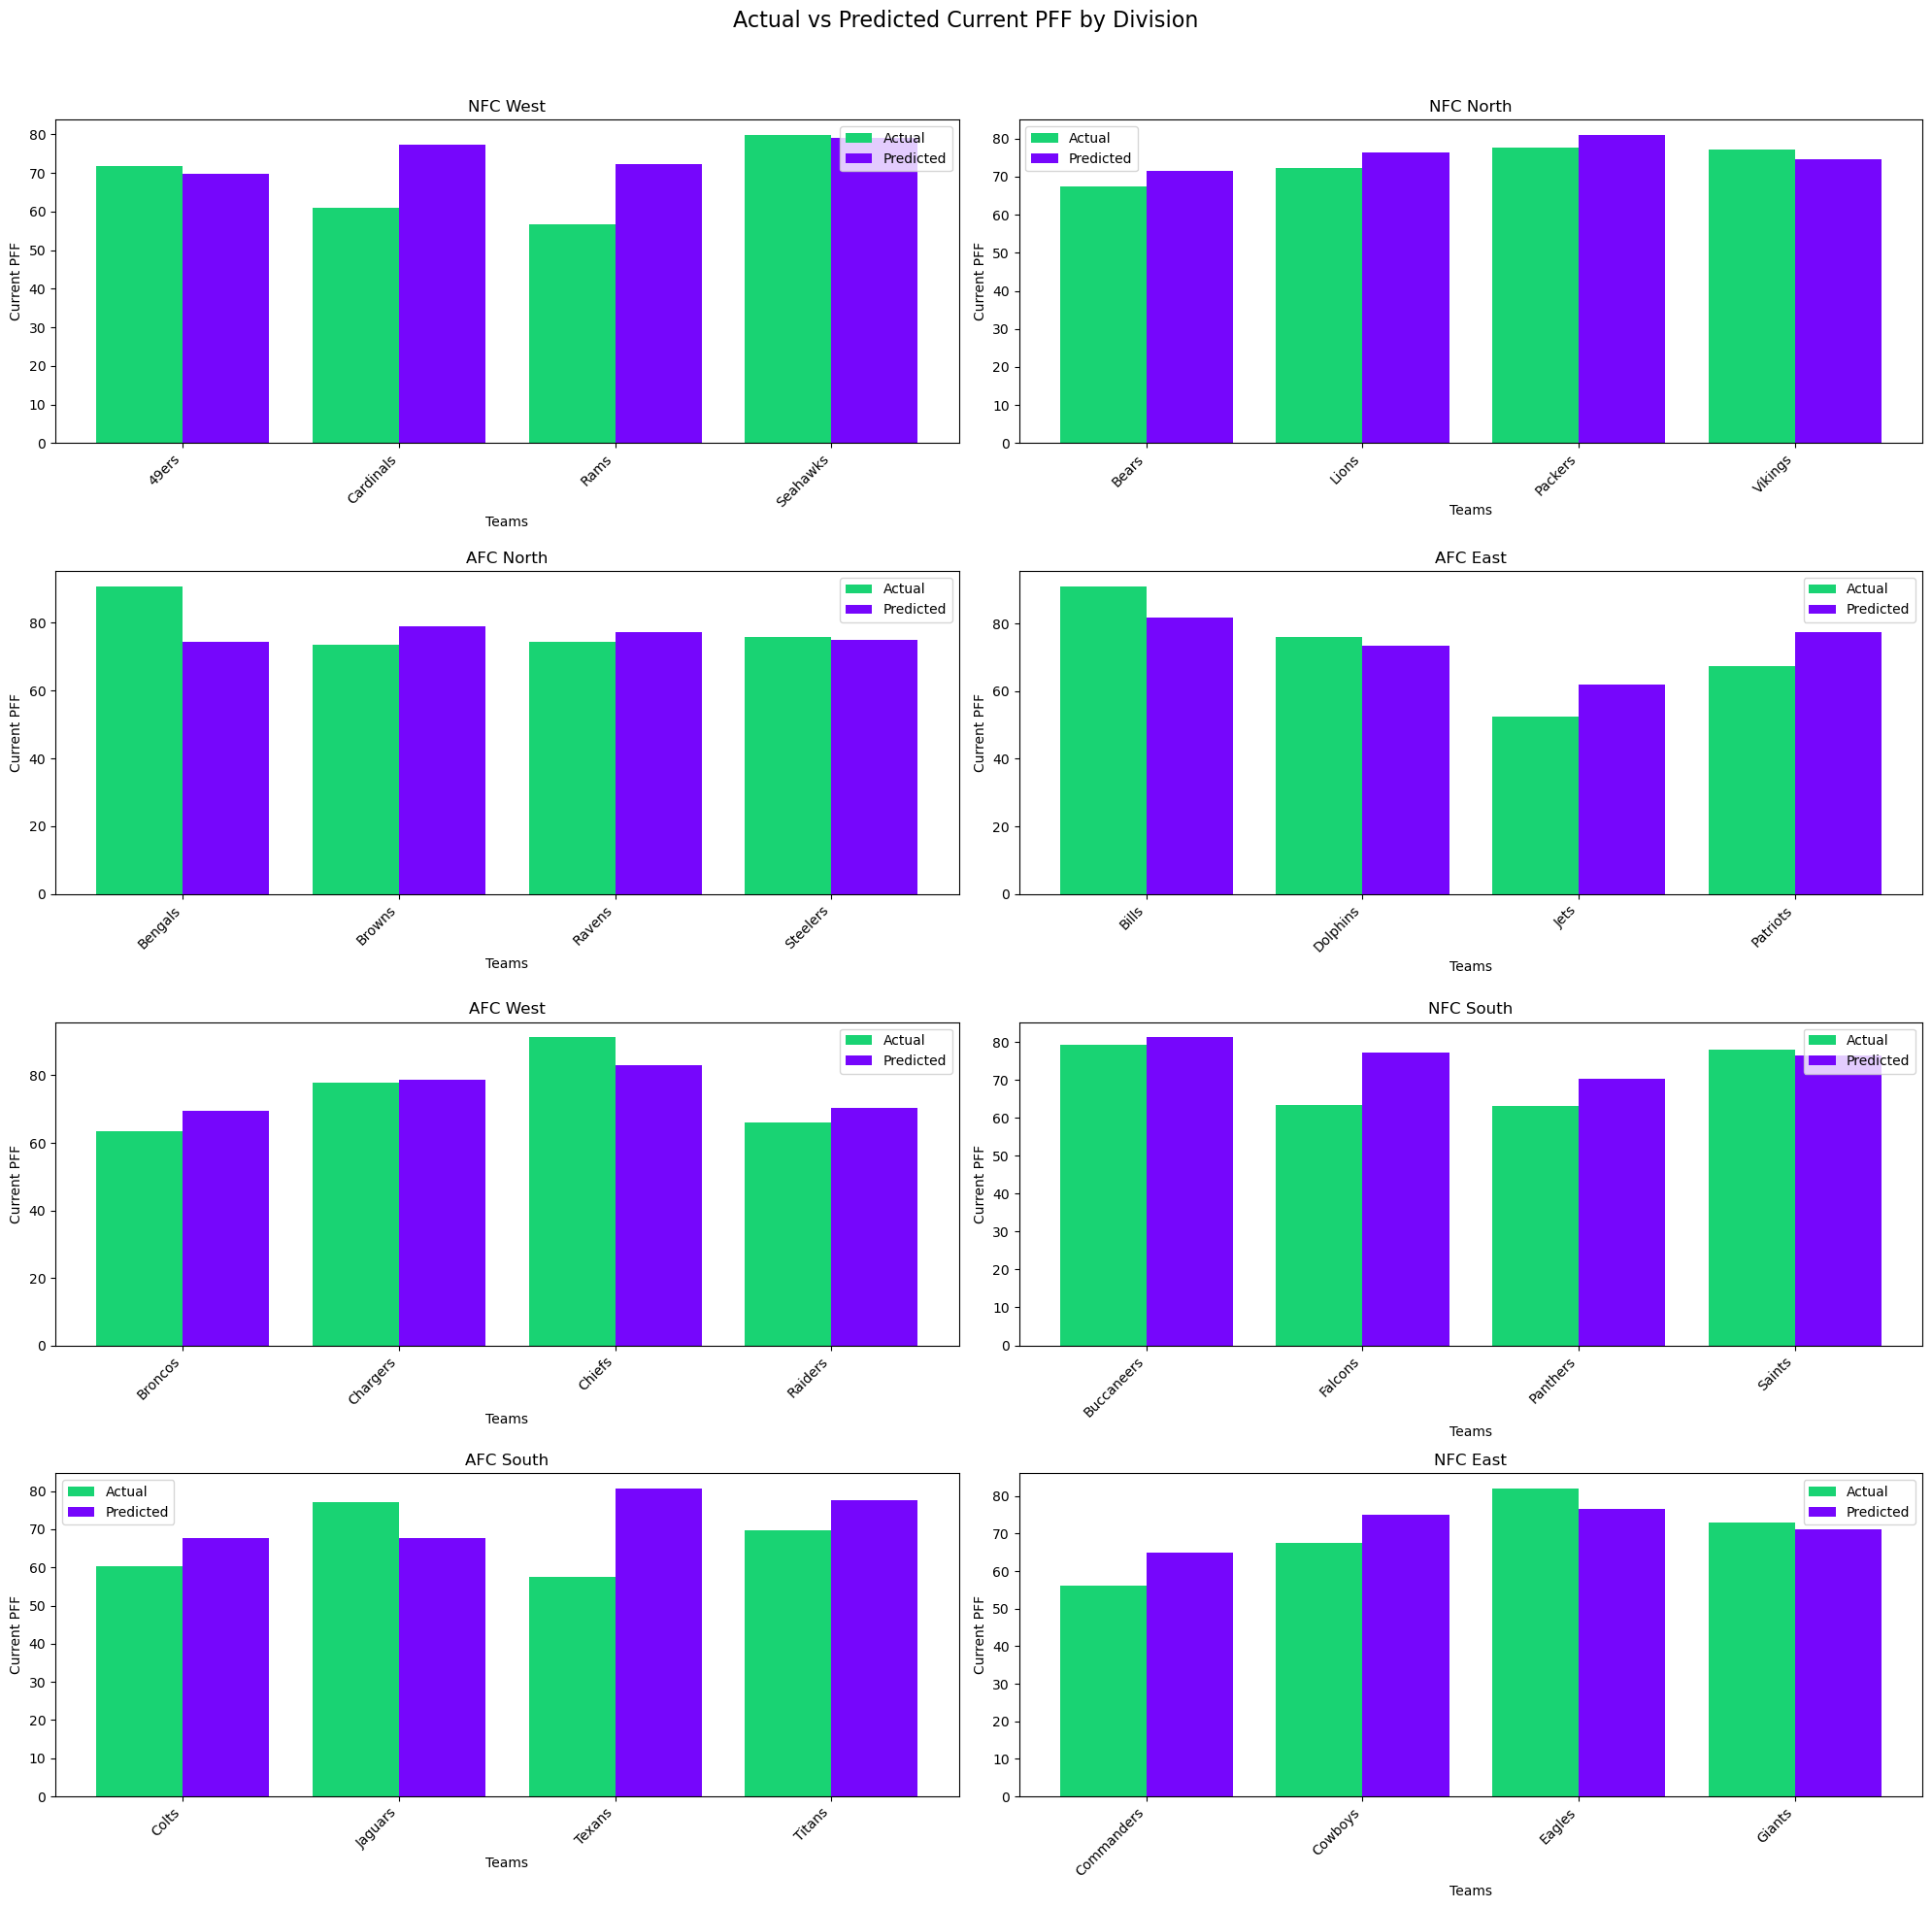

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 168.0147 - val_loss: 108.9043
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 252.0688 - val_loss: 89.9616
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 130.3280 - val_loss: 76.2262
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 314.8296 - val_loss: 98.9711
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 160.9315 - val_loss: 87.4205
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 168.7118 - val_loss: 81.8718
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 177.2237 - val_loss: 84.3667
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 177.7379 - val_loss: 91.6199
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 160.5989 - val_loss: 90.6413
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 178.4400 - val_loss: 83.8763
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 223.0000 - val_loss: 71.8997
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

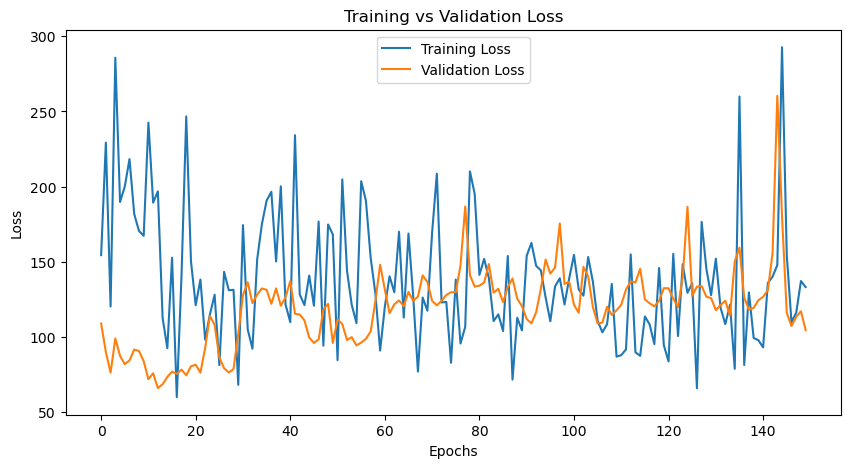

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.3904


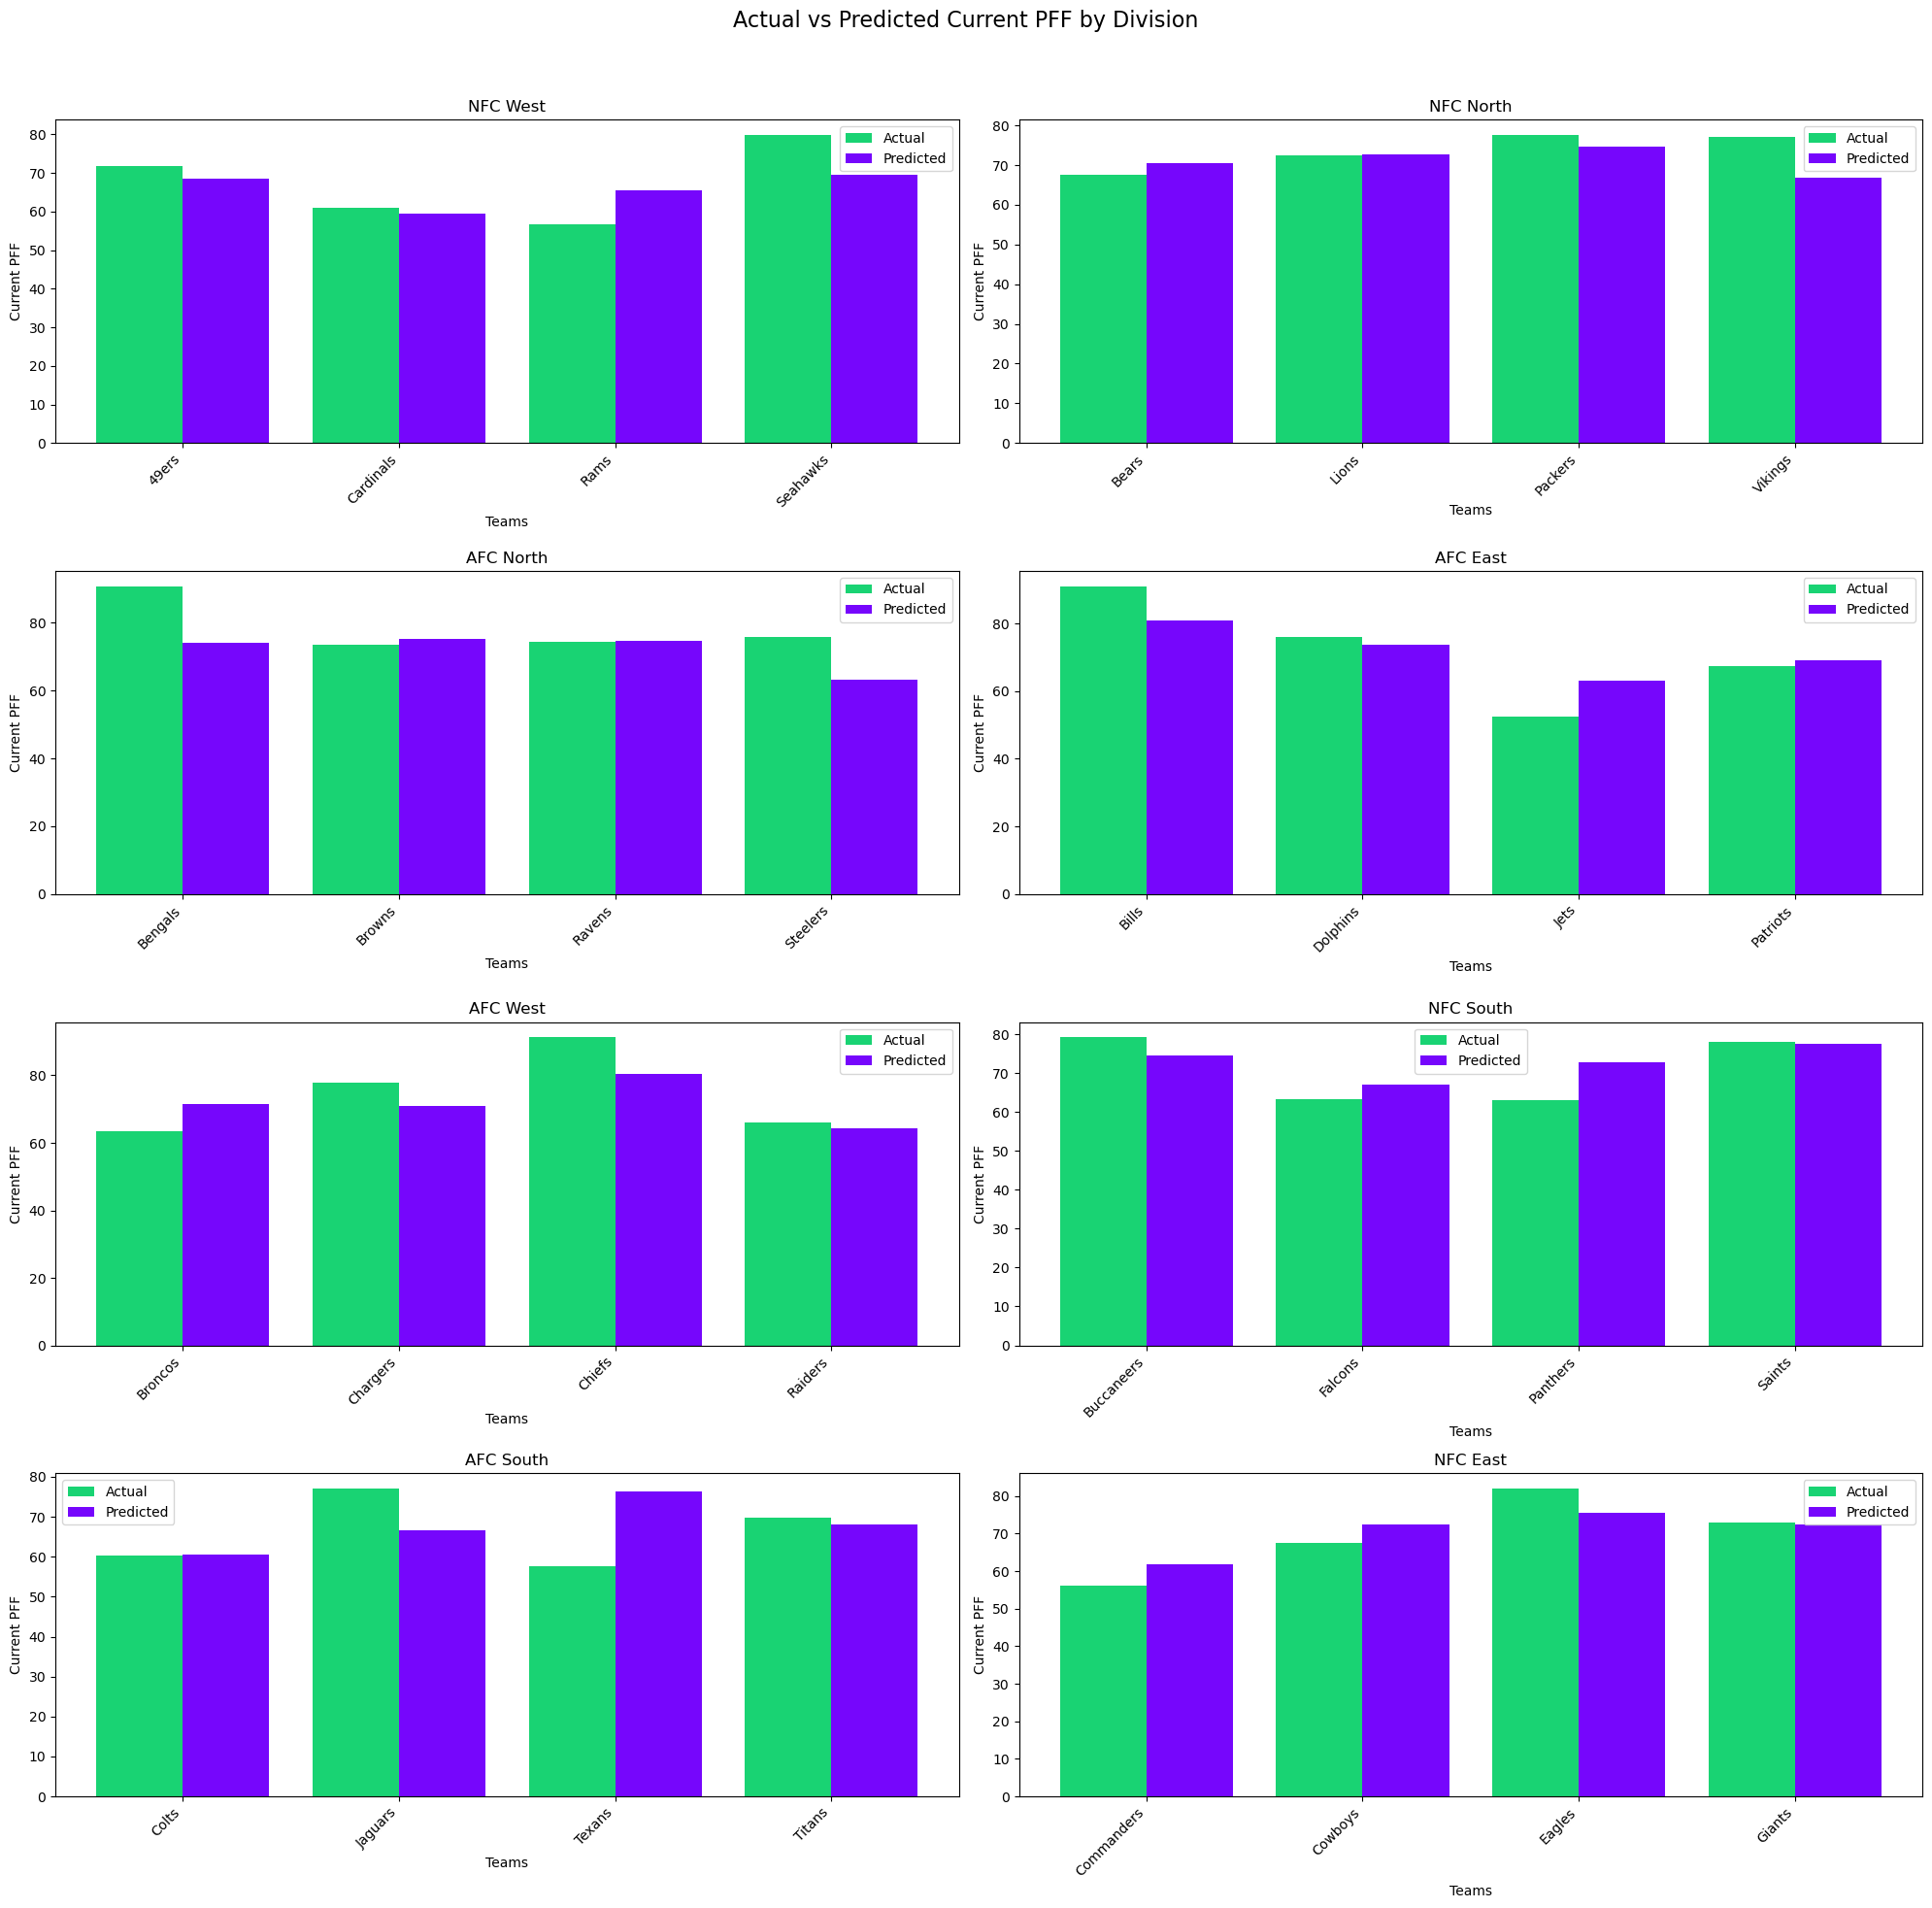

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 89.8974 - val_loss: 107.2064
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.5449 - val_loss: 103.8461
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.0322 - val_loss: 106.5294
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.9095 - val_loss: 118.9528
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 161.5312 - val_loss: 130.9051
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 135.8507 - val_loss: 141.6023
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120.3748 - val_loss: 154.1025
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.5928 - val_loss: 153.1009
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 100.8455 - val_loss: 146.1877
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 153.8657 - val_loss: 166.0576
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.4282 - val_loss: 186.0734
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

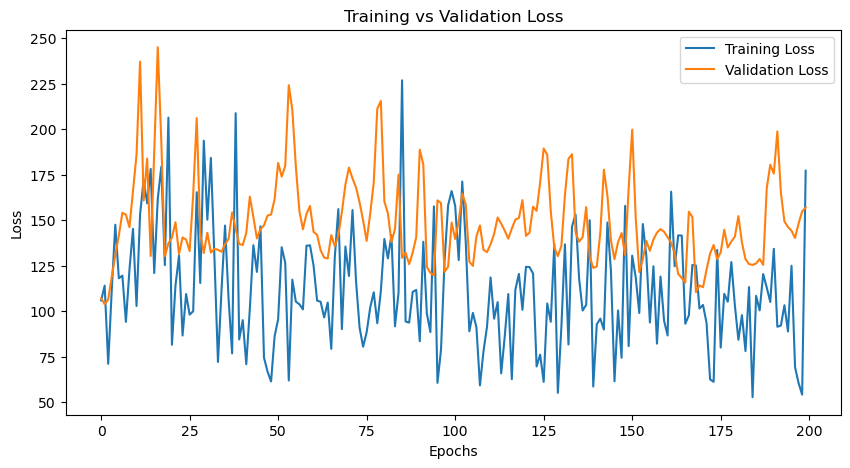

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R² Score: -0.2329


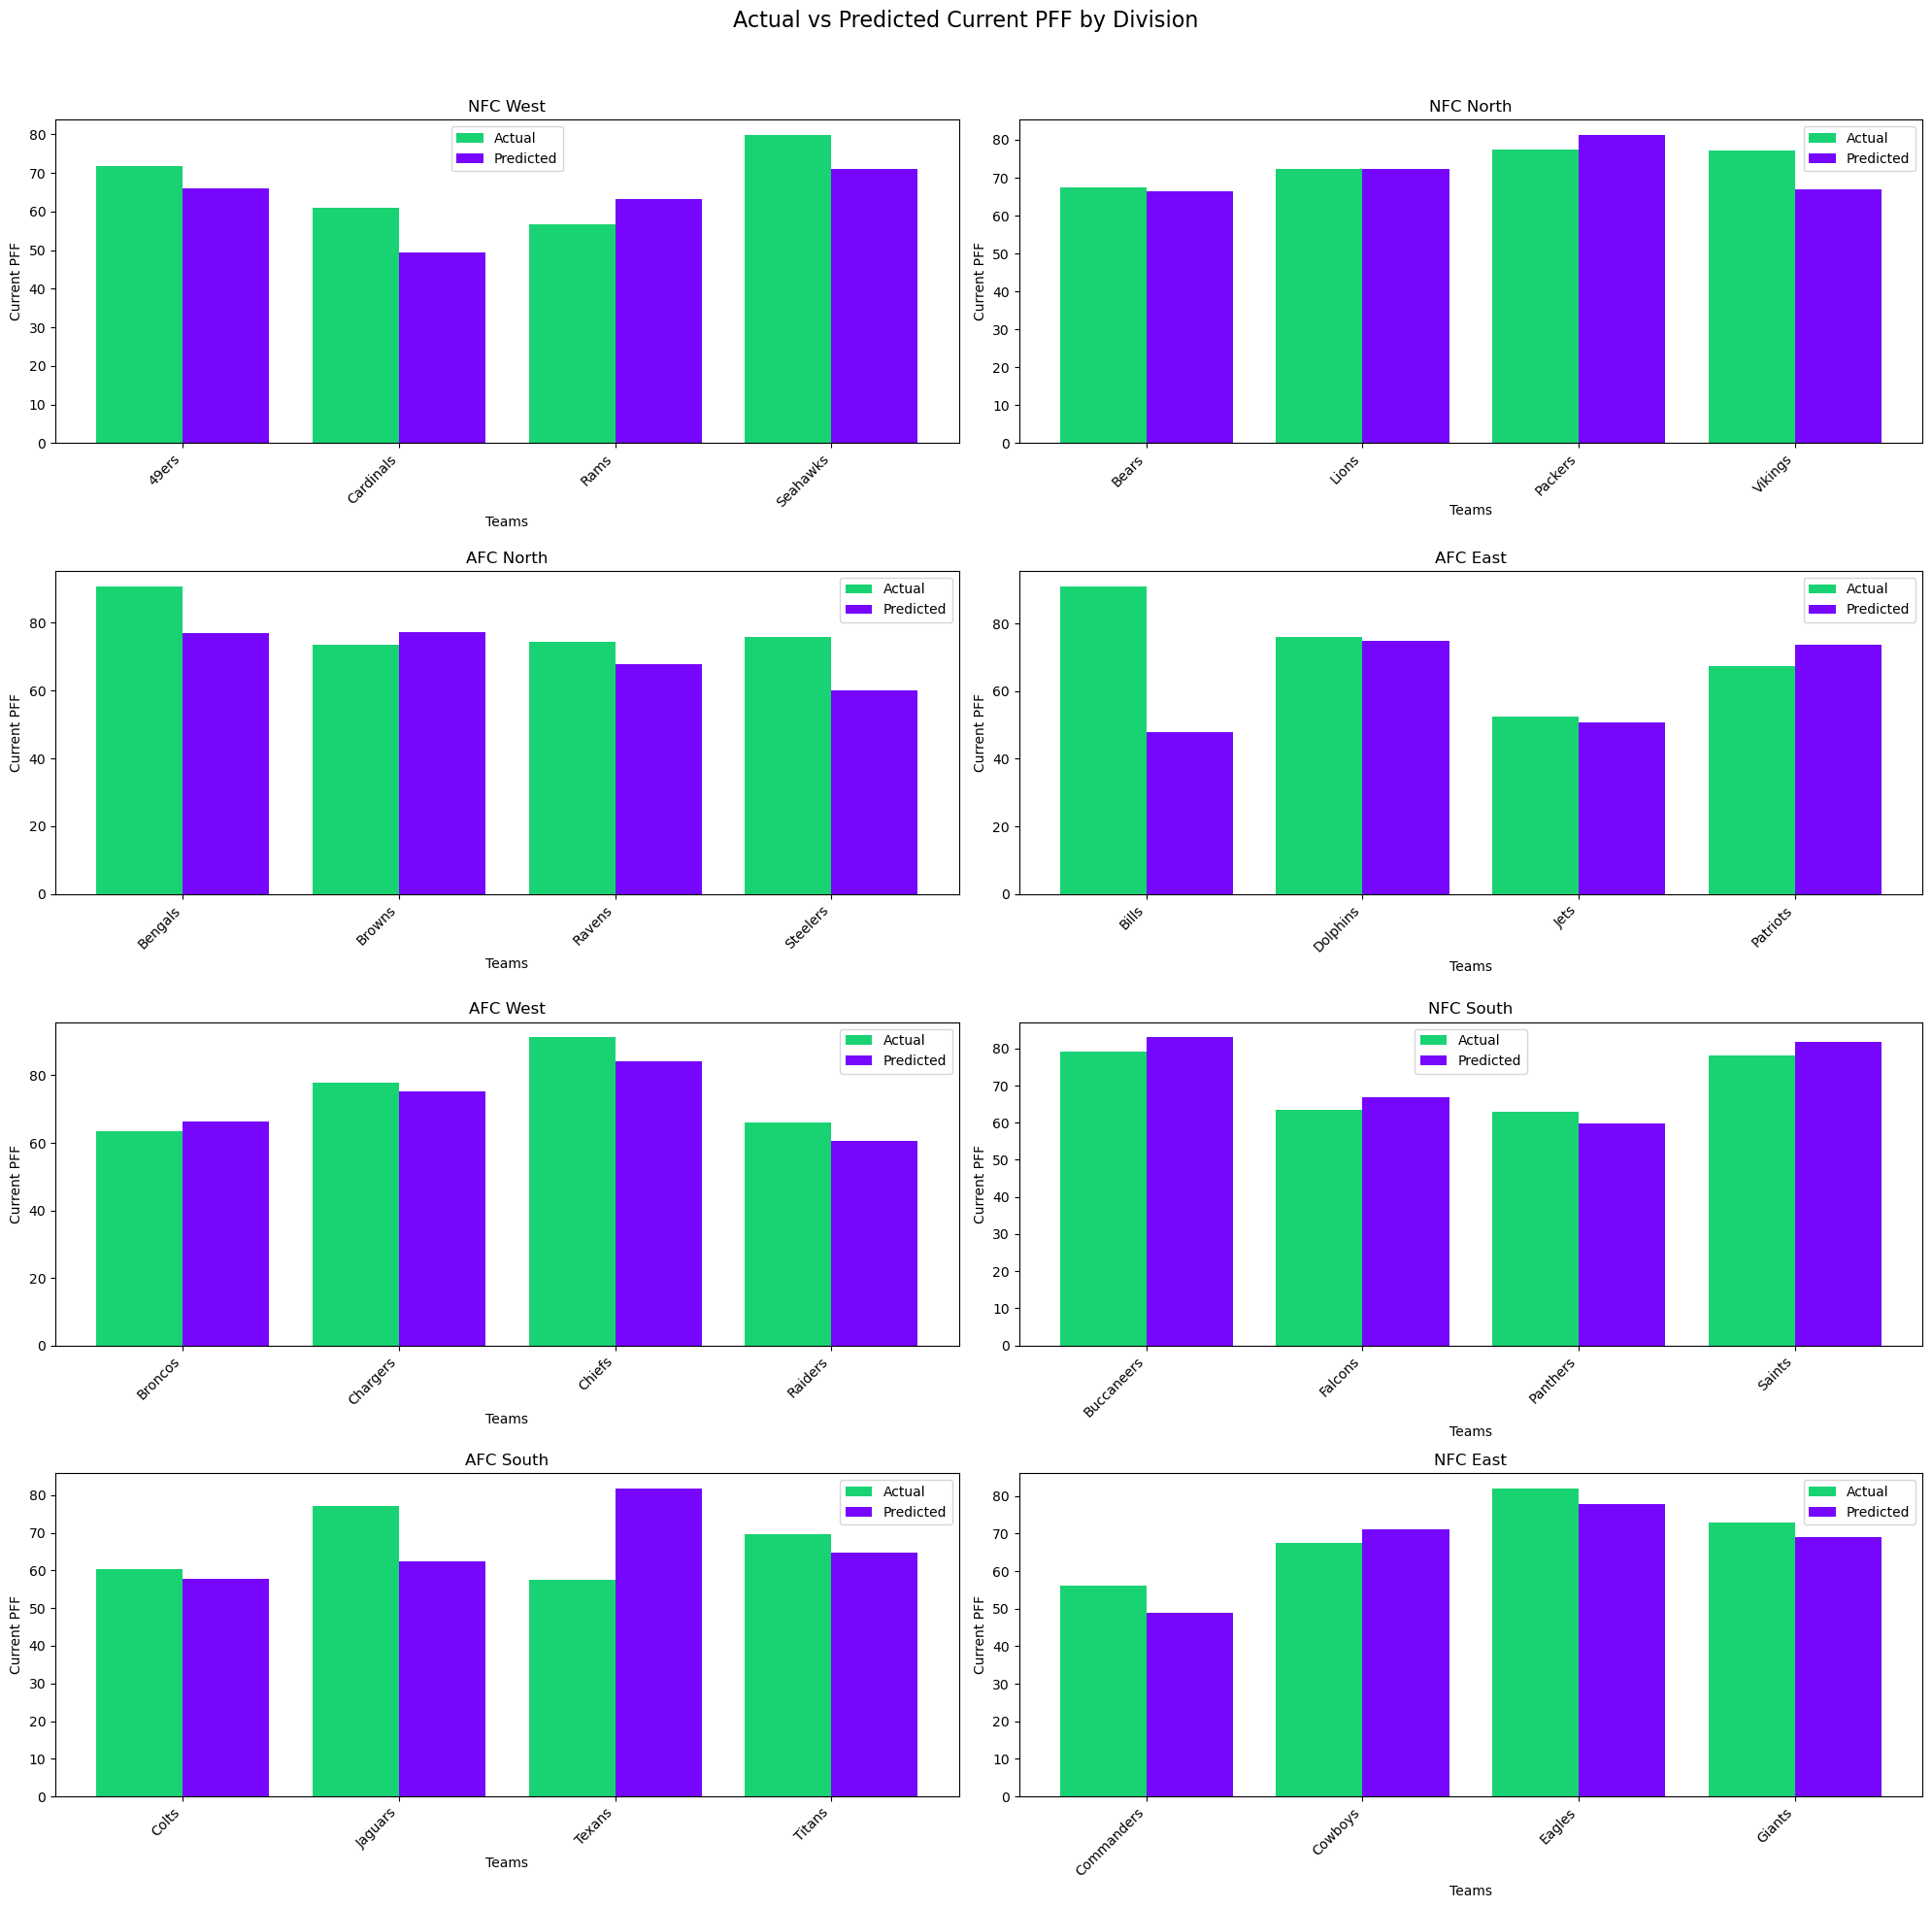

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 168.2562 - val_loss: 169.4648
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 256.9305 - val_loss: 147.8238
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 142.6918 - val_loss: 143.8821
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62.9131 - val_loss: 139.3359
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81.8864 - val_loss: 134.7893
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 136.6620 - val_loss: 145.7437
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.1422 - val_loss: 167.4228
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124.0355 - val_loss: 159.9955
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 157.5534 - val_loss: 140.1262
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.6194 - val_loss: 133.3141
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.0496 - val_loss: 132.1319
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

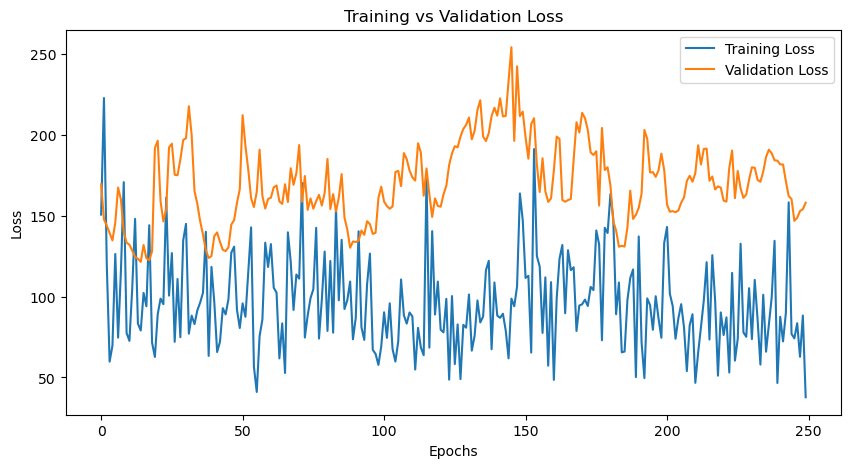

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R² Score: 0.4478


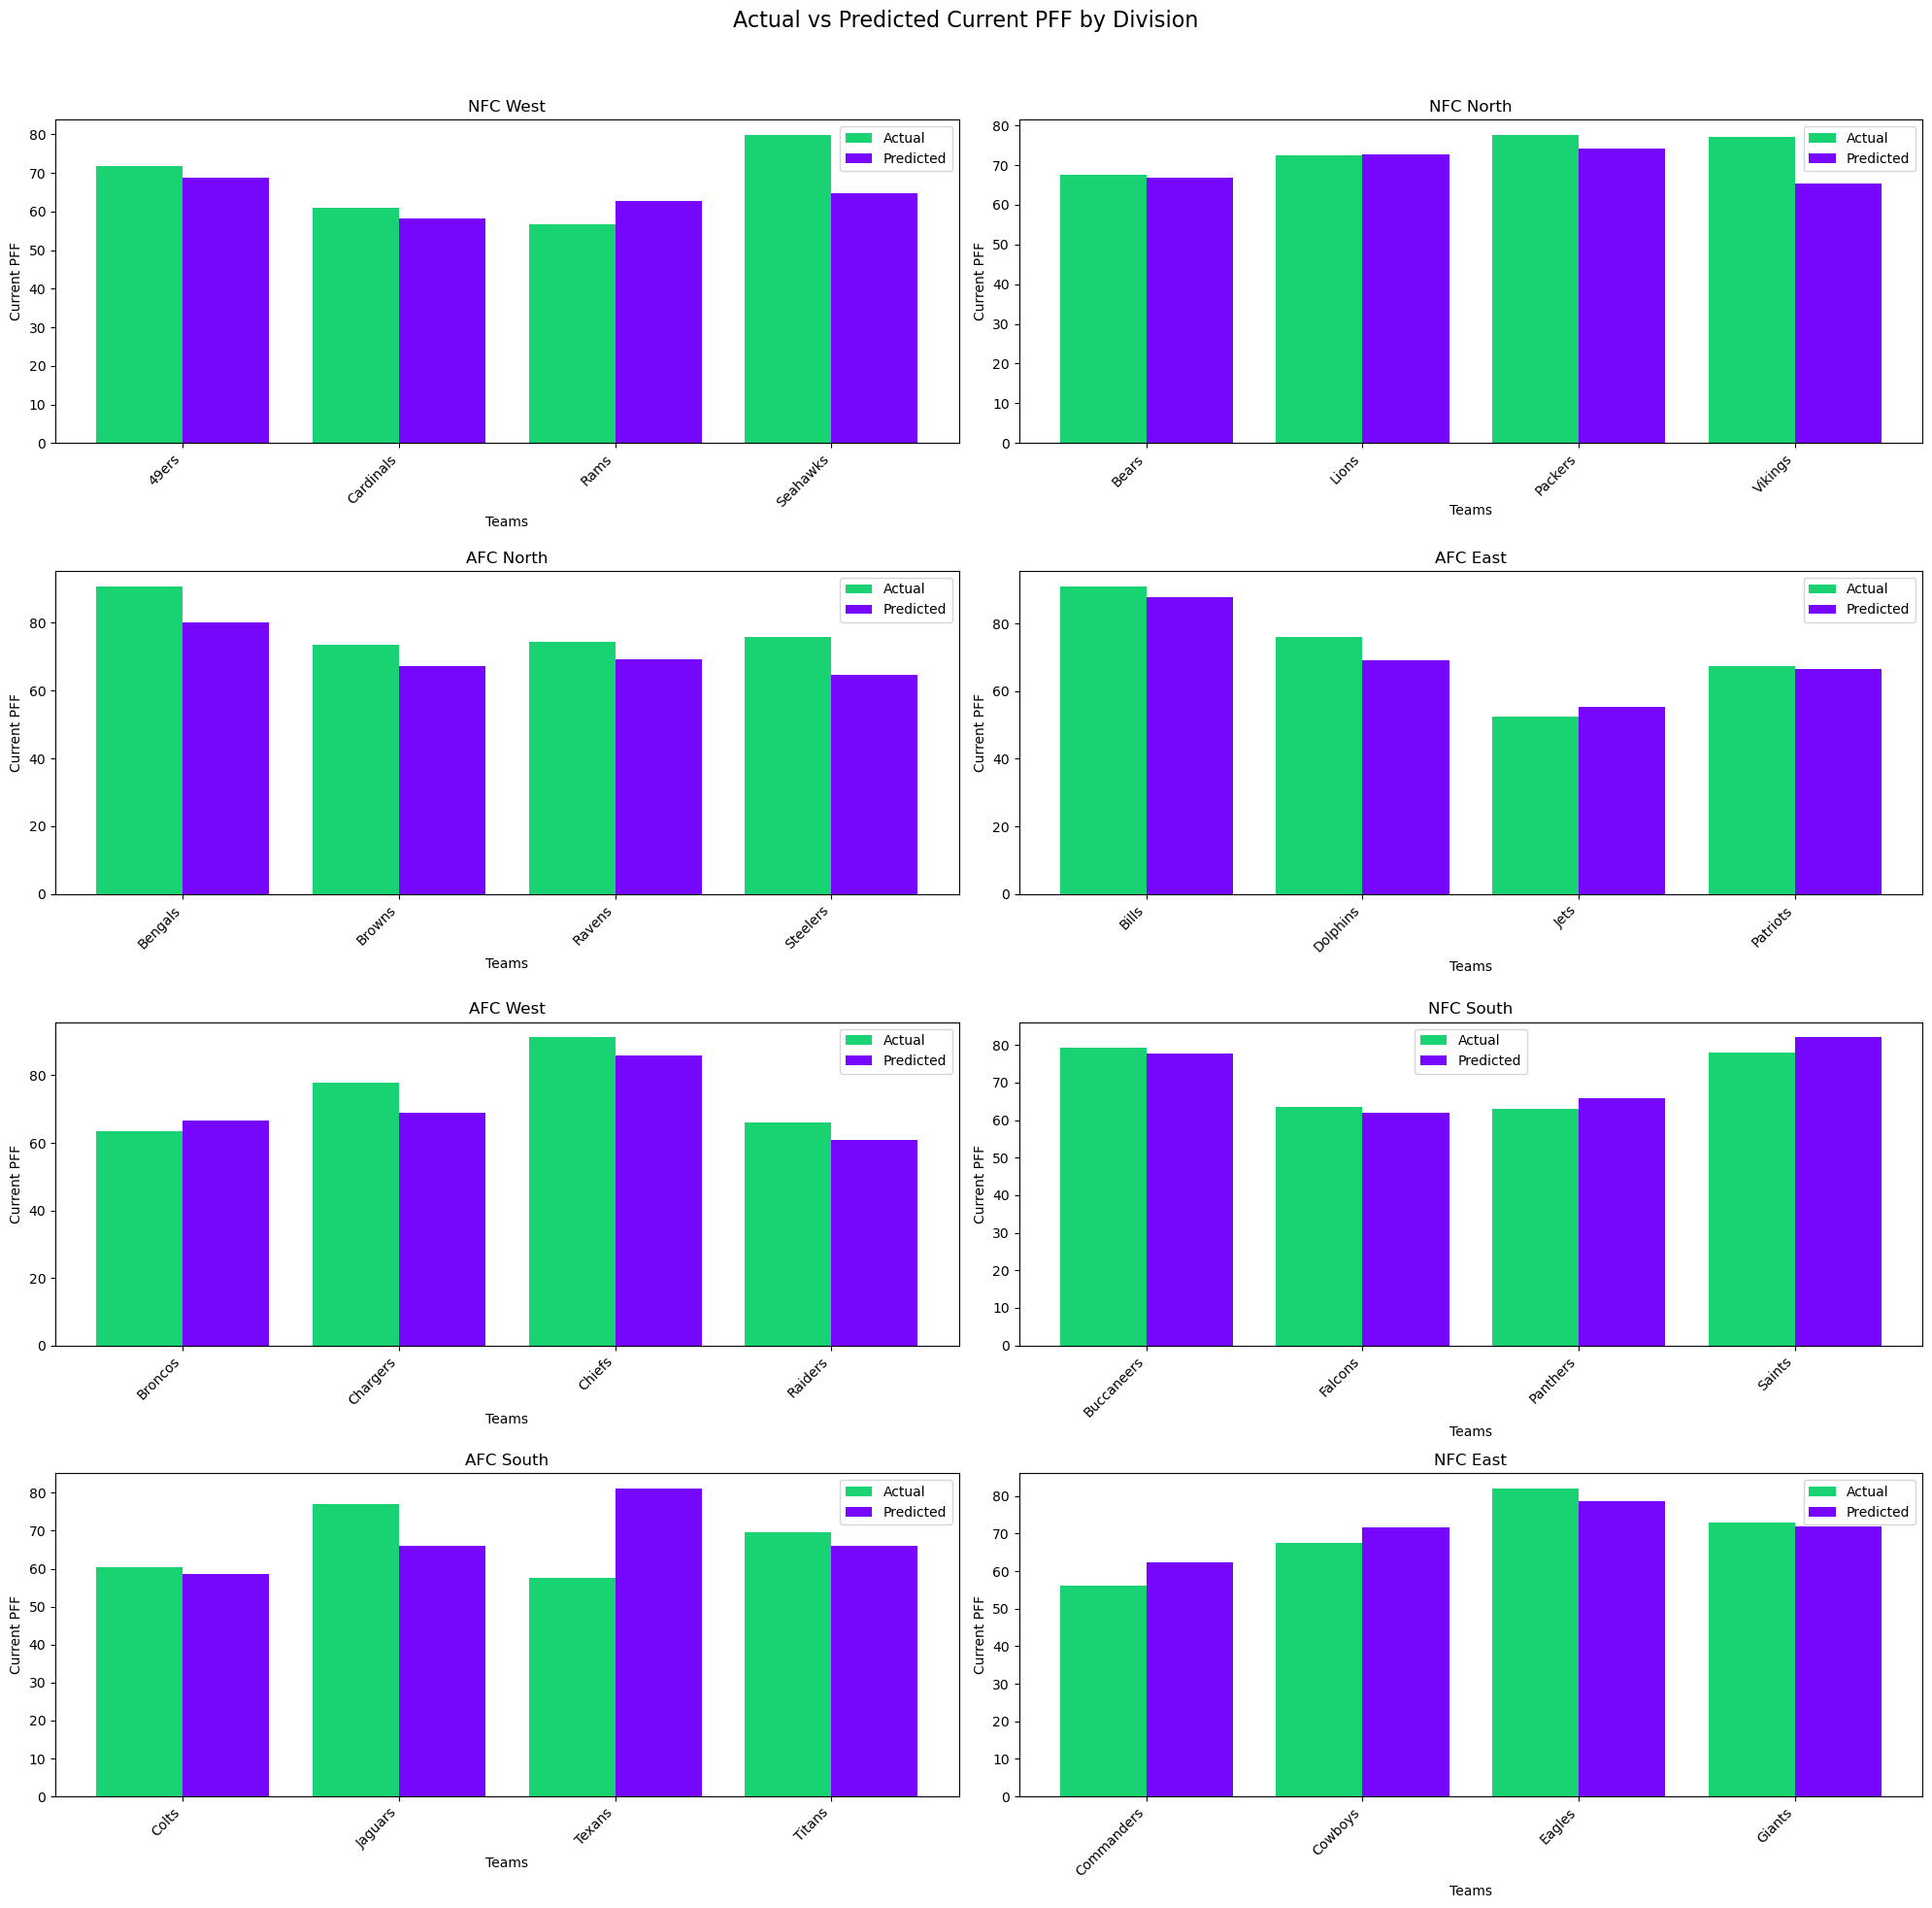

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32.9515 - val_loss: 165.4671
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.5367 - val_loss: 167.8712
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.9952 - val_loss: 173.3725
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.4826 - val_loss: 178.2993
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.1595 - val_loss: 181.1739
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.8035 - val_loss: 180.9742
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.1020 - val_loss: 194.4517
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.0883 - val_loss: 189.1947
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 104.6404 - val_loss: 191.4605
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.7317 - val_loss: 194.3864
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90.5880 - val_loss: 198.1044
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

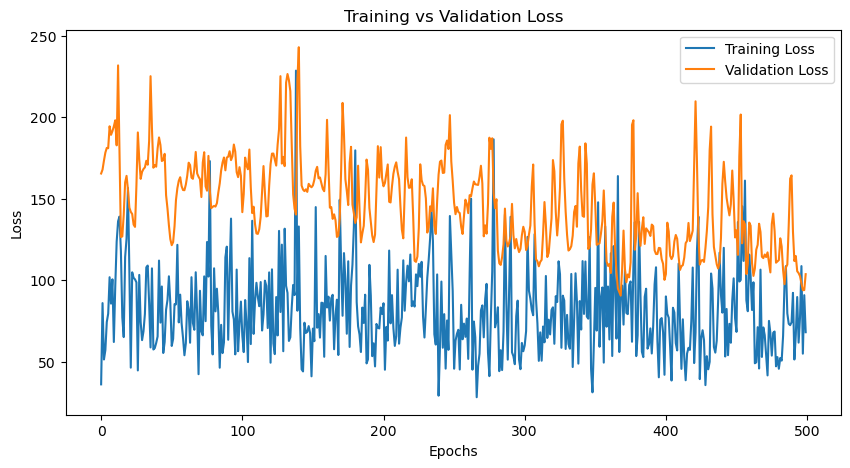

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.7057


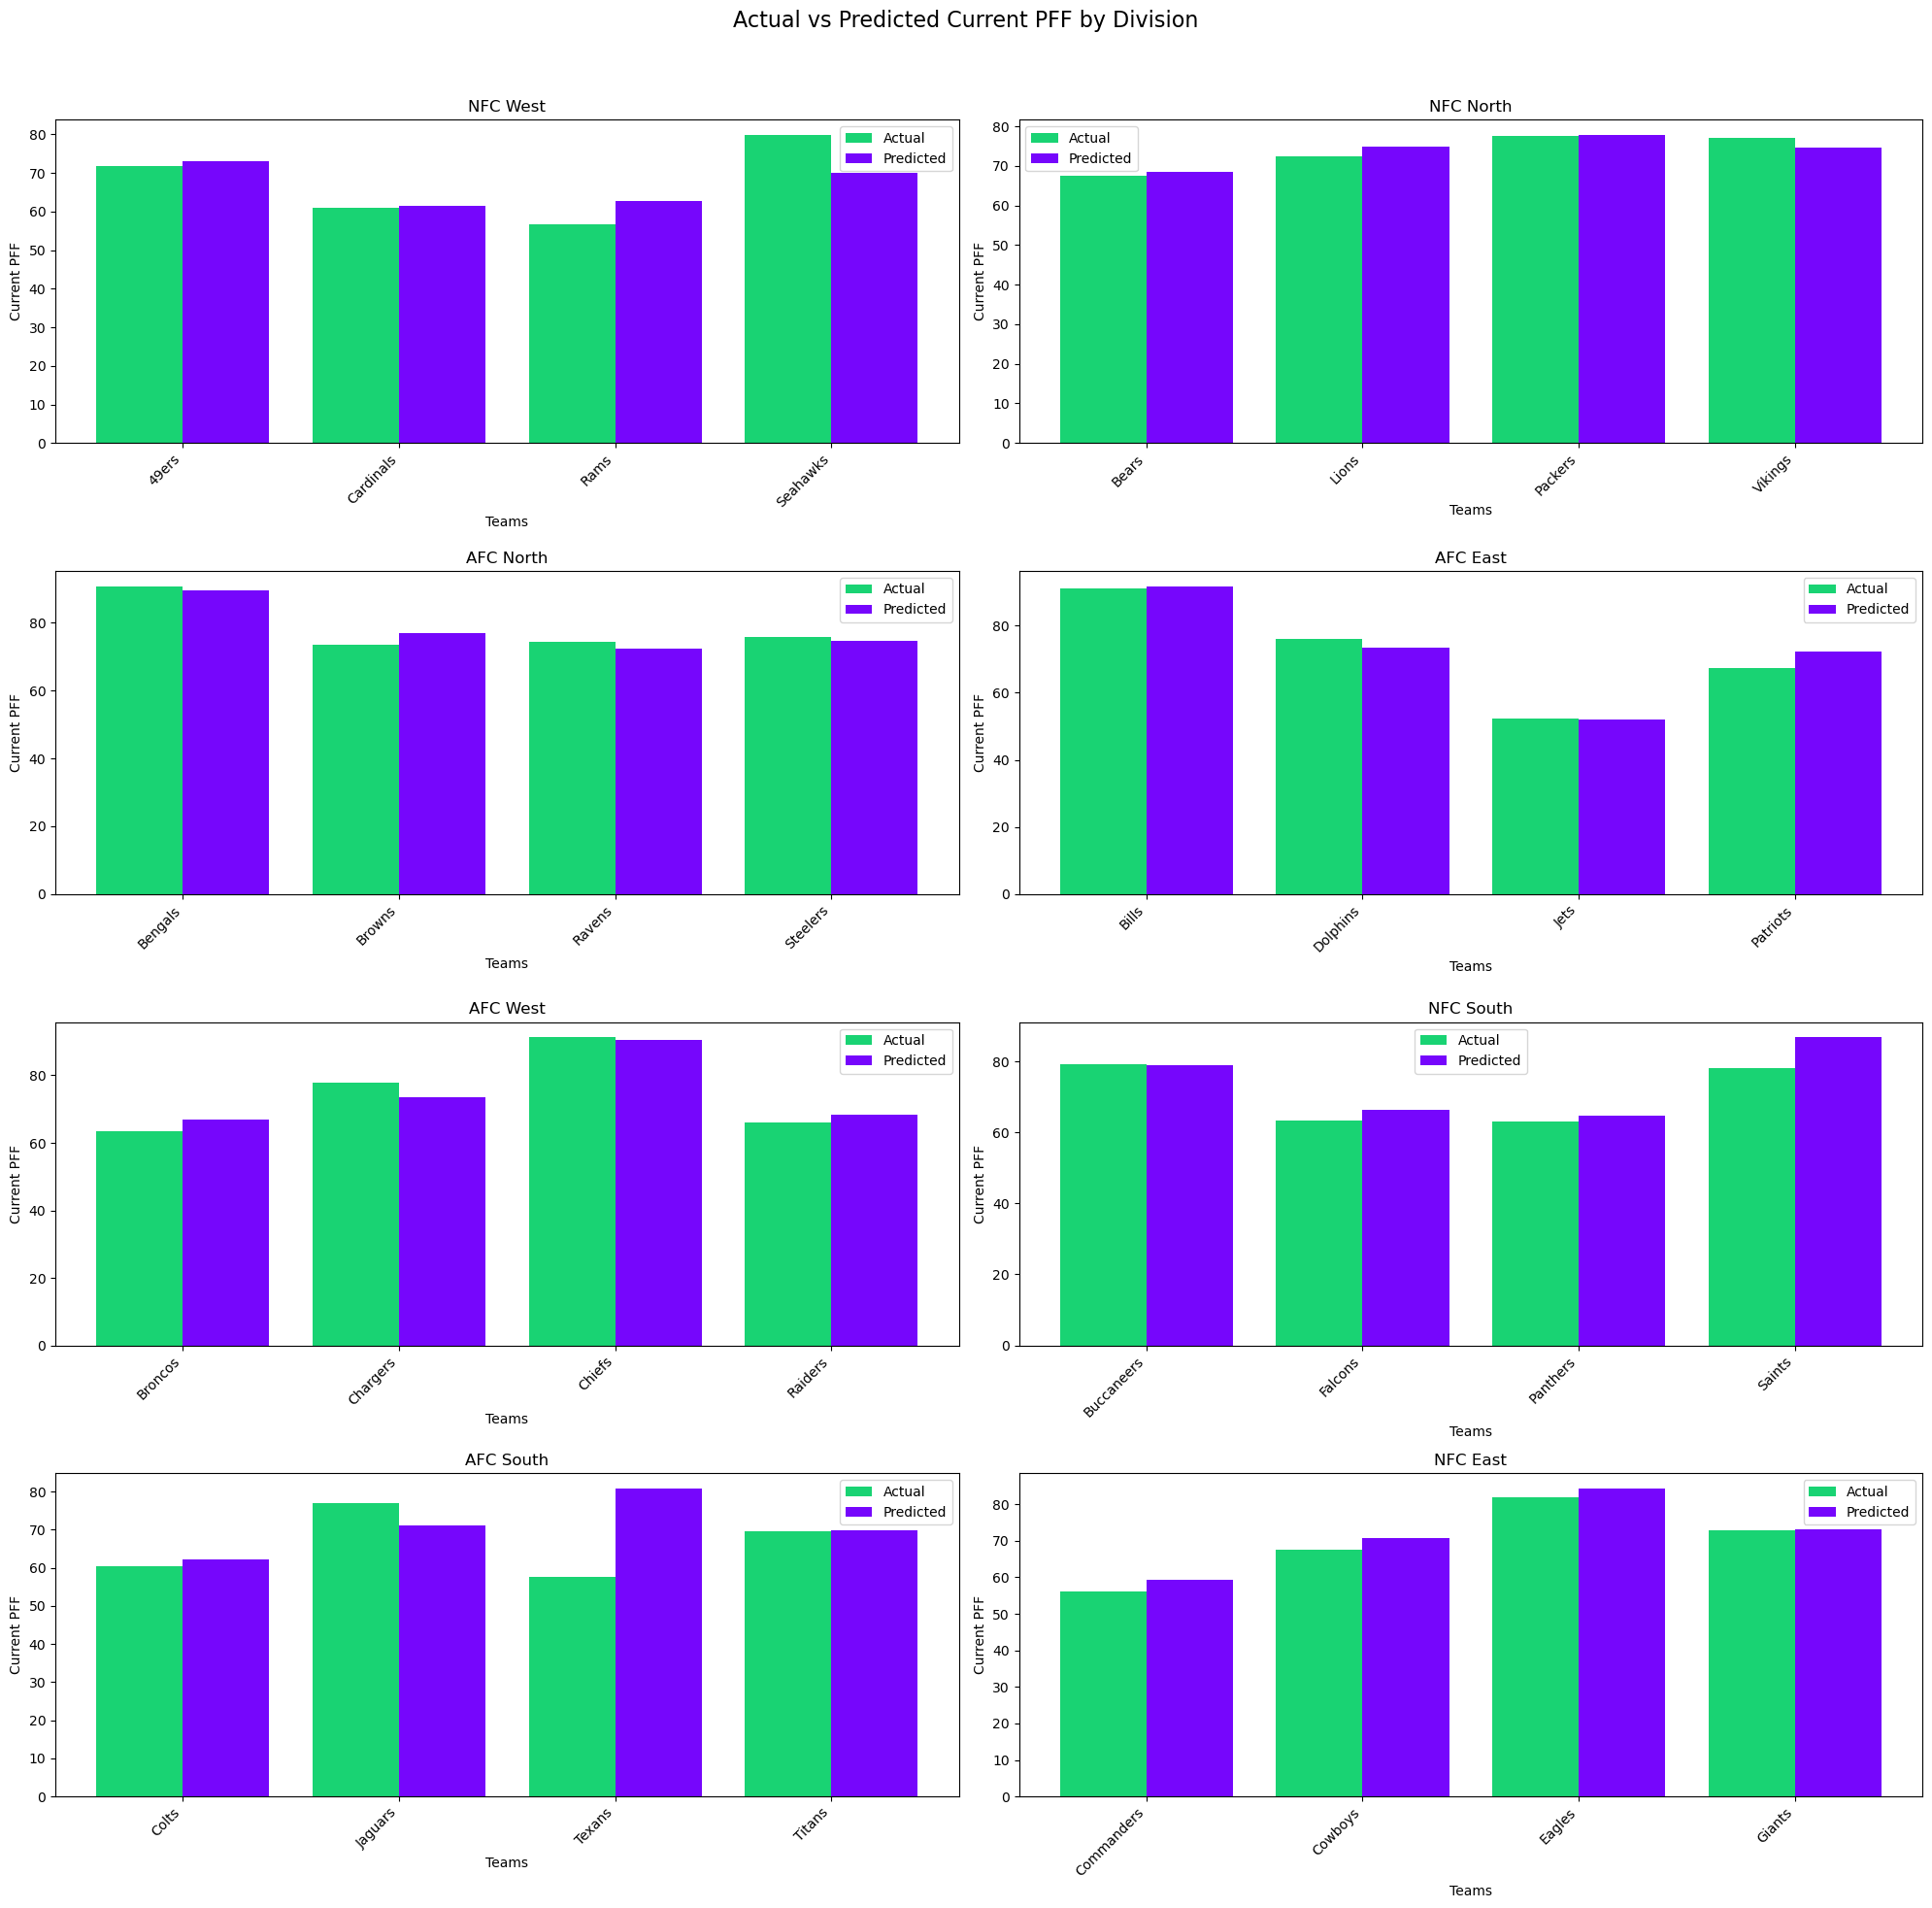

Epoch 1/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 38.1918 - val_loss: 111.2628
Epoch 2/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.5951 - val_loss: 116.0071
Epoch 3/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 85.4864 - val_loss: 110.0523
Epoch 4/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.5458 - val_loss: 107.6610
Epoch 5/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 104.3260 - val_loss: 112.5064
Epoch 6/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 59.7249 - val_loss: 102.5647
Epoch 7/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.2940 - val_loss: 98.7208
Epoch 8/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.0777 - val_loss: 102.7218
Epoch 9/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 113.1798 - val_loss: 107.0616
Epoch 10/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.9548 - val_loss: 120.7171
Epoch 11/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.5905 - val_loss: 117.5867
Epoch 12/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

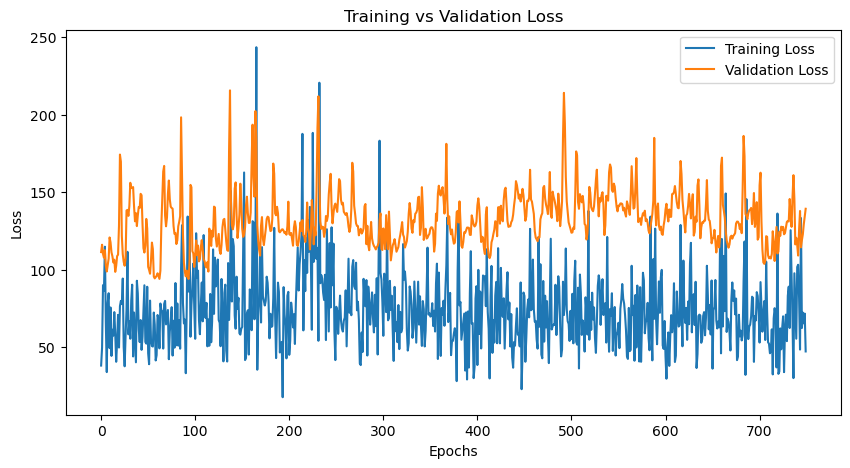

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
R² Score: 0.6032


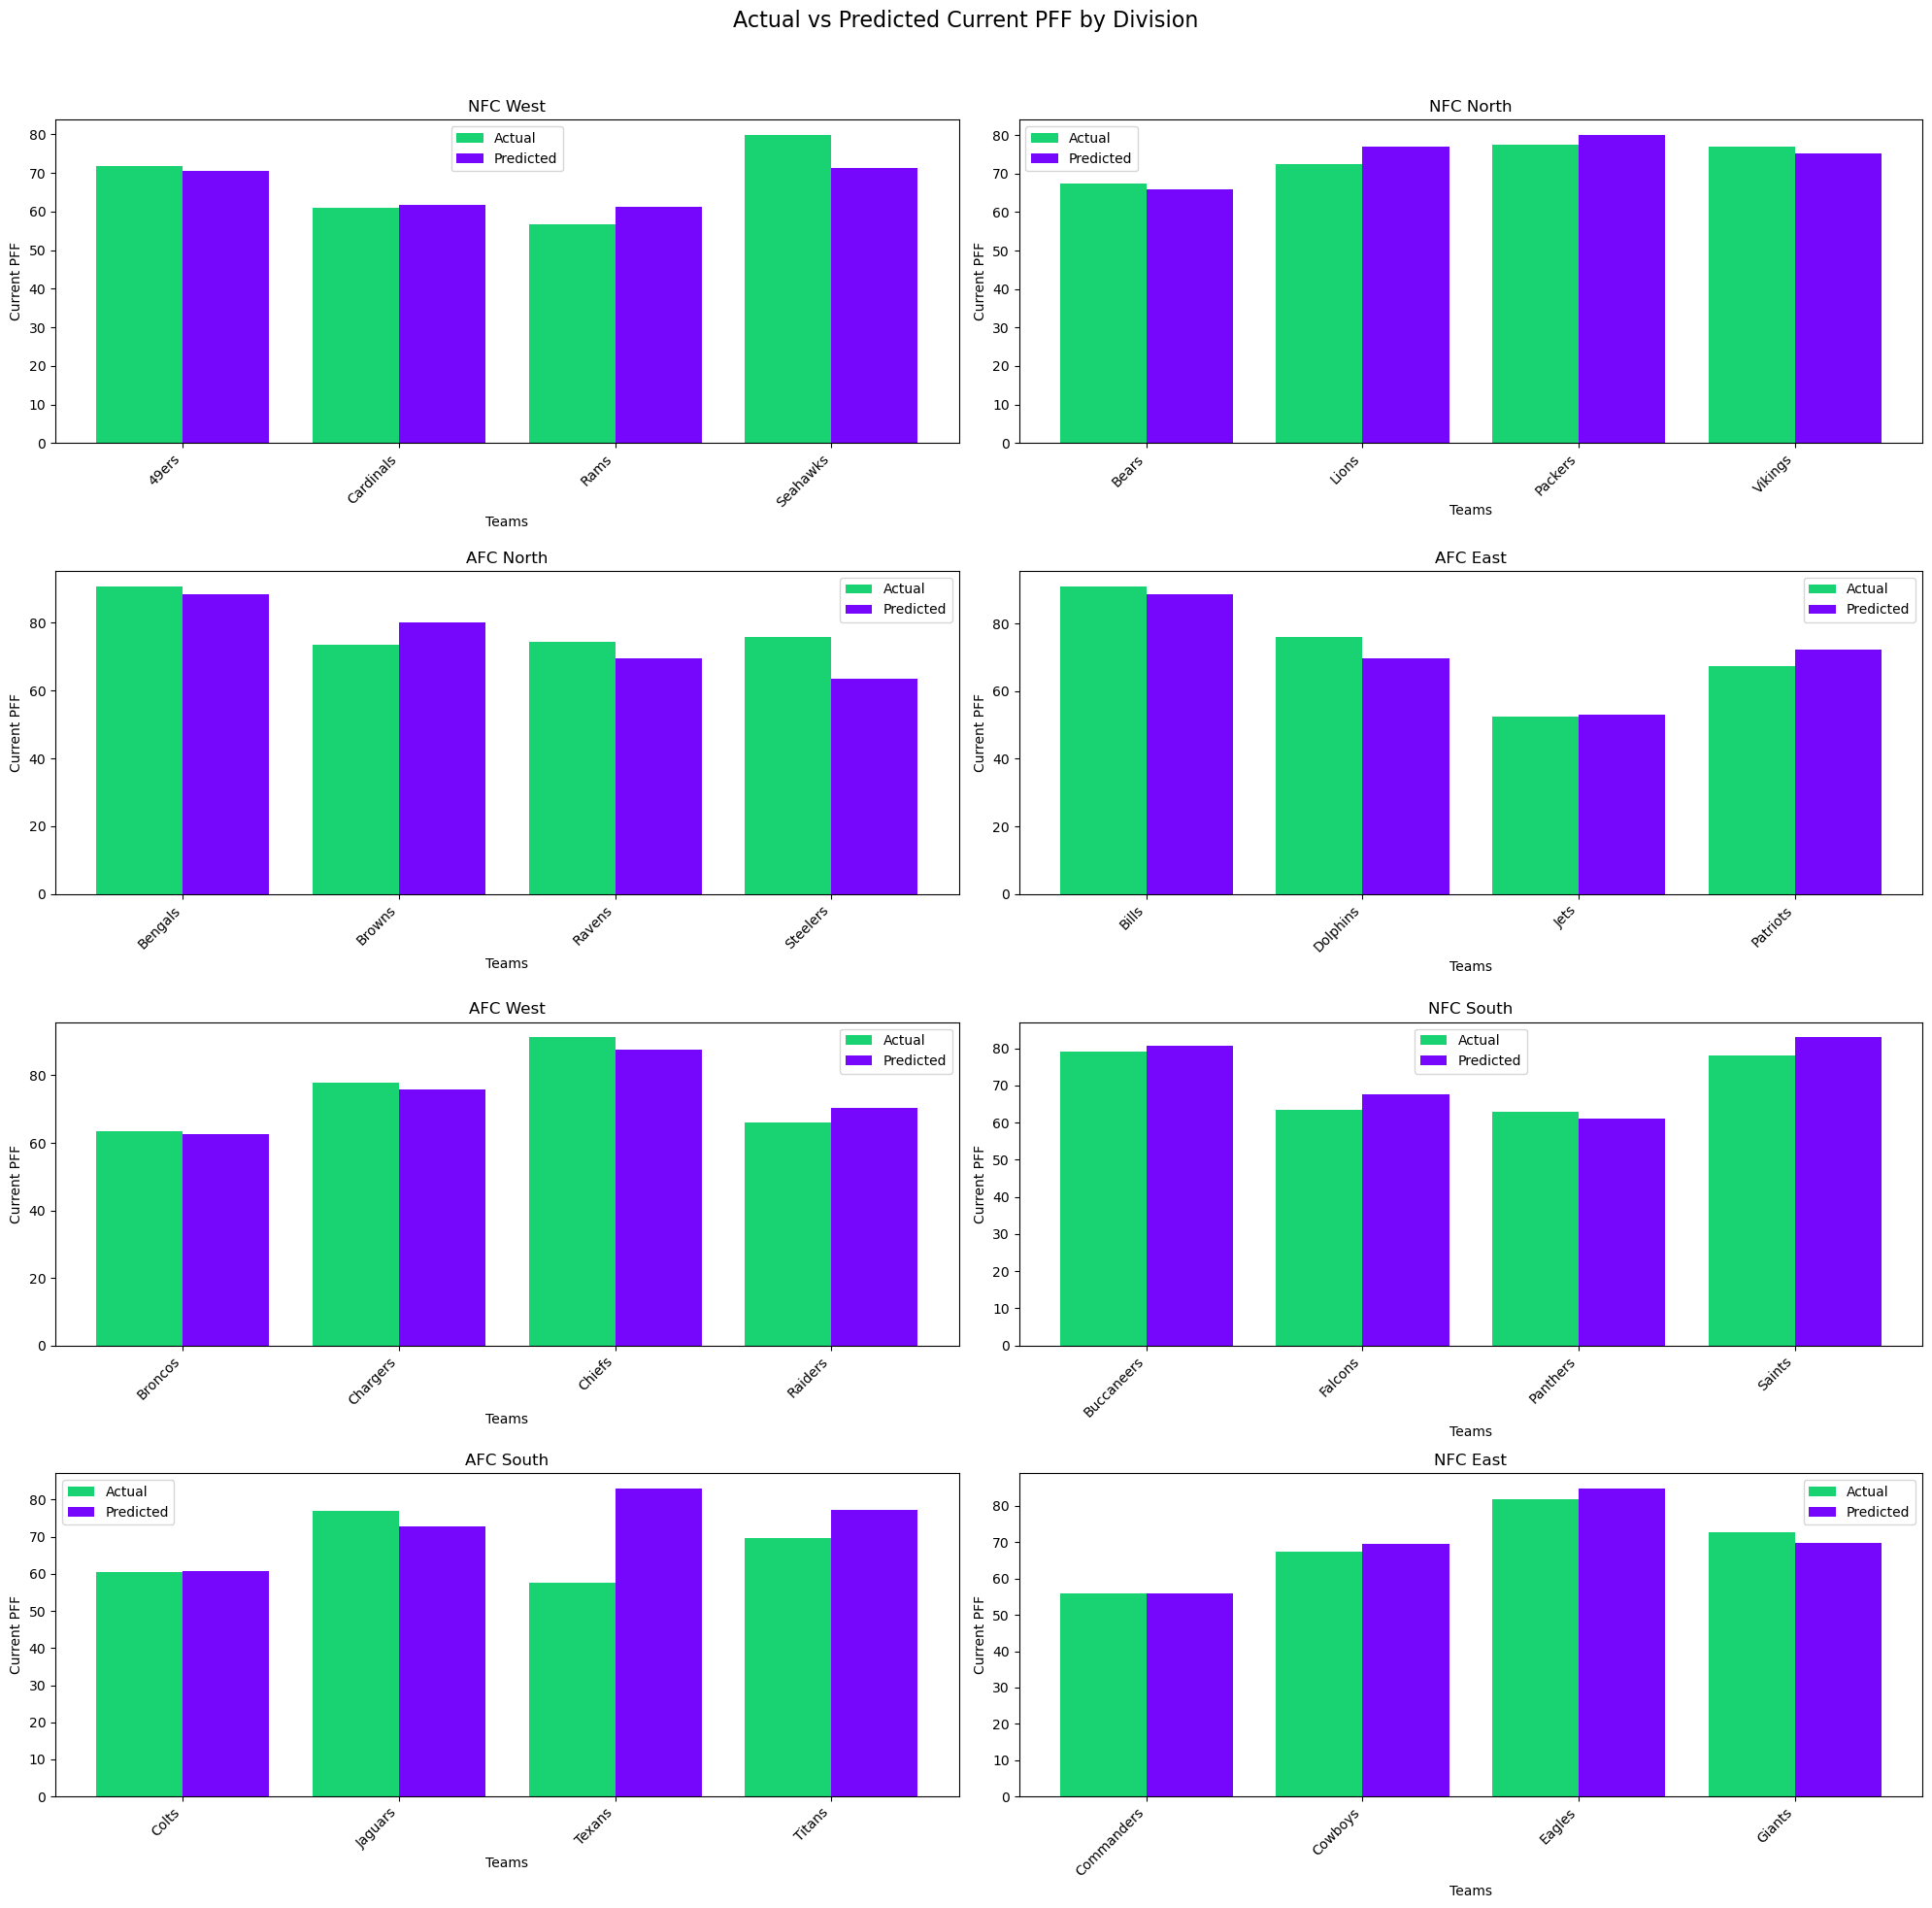

In [15]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [80, 100, 150, 200, 250, 500, 750]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    data = df[df['Year'] == 2022].copy()
    data['Predicted_PFF'] = y_pred
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Current_PFF', 'Predicted_PFF', 'Team', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Current PFF by Division', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Current_PFF'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_PFF'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Current PFF')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()
    
